# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from pylab import rcParams
%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [3]:
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Direct_Bilirubin).reshape(-1,1), Total_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.42502700059429843
slope: [1.93375953]


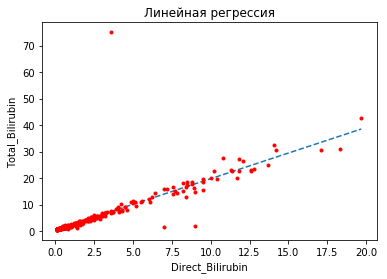

In [4]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Direct_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y, '--')
plt.plot(Direct_Bilirubin,Total_Bilirubin, 'r.')
plt.show()

Заметно на графике, что взаимовзясь высокая. Потому, при прознозировании значения Total_Bilirubin, зная значение Direct_Bilirubin получаются достаточно точный ( или крайне приближенные к точным) значения. Это можно проверить предсказав несколько показателей, для которых уже есть значения в таблице

In [5]:
model.predict(np.array([[0.1],[0.2],[0.3],[1.0]]).reshape(-1, 1))

array([0.61840295, 0.81177891, 1.00515486, 2.35878653])

In [6]:
data_grp = data.groupby('Direct_Bilirubin').mean()
data_sort = data_grp.sort_values('Total_Bilirubin',  ascending = True)
data_sort['Total_Bilirubin'].head(10)

Direct_Bilirubin
0.1    0.639683
0.2    0.776289
0.3    0.982353
0.4    1.261905
0.5    1.305000
0.6    1.568750
0.7    1.590909
0.8    1.745455
0.9    1.857143
1.0    2.130769
Name: Total_Bilirubin, dtype: float64

Сравнивая полученные с помощью Predict значения с табличными, видно что они очень близки друг к другу.

In [7]:
'Коэффицент корреляции Пирсона также говорит о том, что связь между показателями высокая (очень)'

corr, p_value = pearsonr(Total_Bilirubin, Direct_Bilirubin)
corr

0.8746179301164135

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров.
Параметры подобрать с помощью матрицы корреляций. 
Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

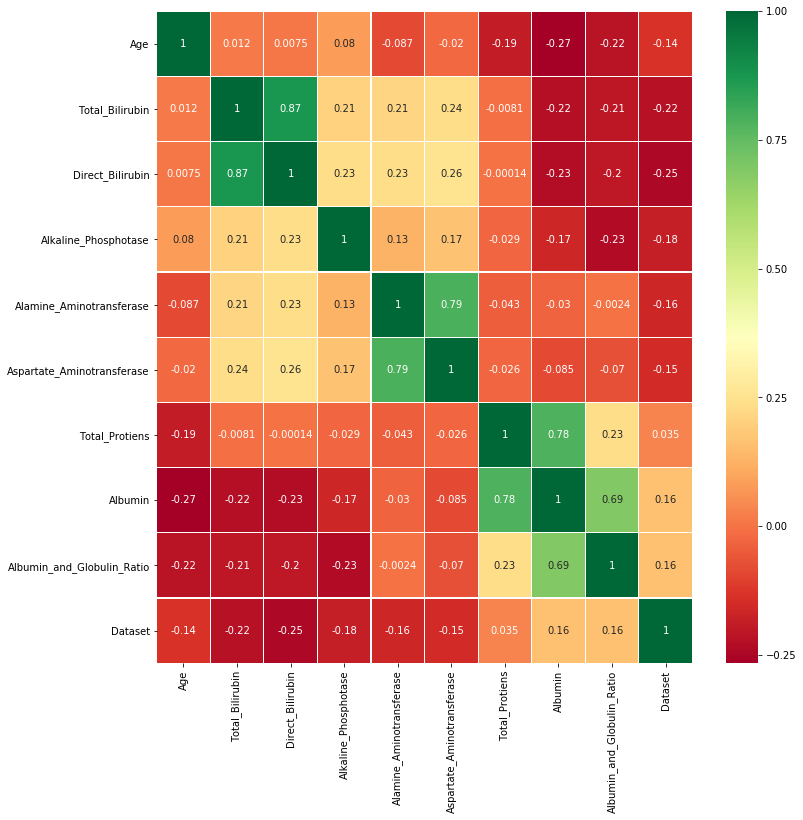

In [8]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

<font color='red'>Анализирую Heatmap можно сделать ввывод, что с Dataset больше всего коррелируют два парамента: Total bilibrium и Direct Bilirubin</font>

In [9]:
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
Dataset = data['Dataset']
x = np.vstack([np.array(Total_Bilirubin), np.array(Direct_Bilirubin)]).T
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

In [10]:
np.around(model.predict([[0.7, 0.1],[0.9, 0.3],[0.6, 0.1]]))

array([1., 1., 1.])

<font color='red'>Было проверено 3 значения, из которых два в таблице (dataset = 2 ), но модель выдает 1, следовательно модель не работает.
Вероятнее всего это связано с тем, что корреляция слишком мала, чтоб корректно предиктить данные.</font>

In [11]:
data_grp = data.groupby('Dataset').mean()
data[['Dataset','Total_Bilirubin','Direct_Bilirubin']].head(16)

,Dataset,Total_Bilirubin,Direct_Bilirubin
0,1,0.7,0.1
1,1,10.9,5.5
2,1,7.3,4.1
3,1,1.0,0.4
4,1,3.9,2.0
5,1,1.8,0.7
6,1,0.9,0.2
7,1,0.9,0.3
8,2,0.9,0.3
9,1,0.7,0.2


Нашел пару NaN значений, которые мешают мне построить модель. Почистил

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [13]:
data = data.dropna()

In [14]:
Albumin_and_Globulin_Ratio = data['Albumin_and_Globulin_Ratio']
Total_Protiens = data['Total_Protiens']
Albumin = data['Albumin']
x = np.vstack([np.array(Albumin_and_Globulin_Ratio), np.array(Total_Protiens)]).T
y = np.array(Albumin)
model = LinearRegression().fit(x, y)

In [15]:
model.predict([[0.90,6.8 ],[0.74, 7.5],[1, 6.8]])

array([3.2291654 , 3.35334842, 3.36220875])


<font color='red'>Здесь уже наблюдаются более точные предсказания. Такой модели можно доверять в большей степени</font>

In [16]:
data_grp = data.groupby('Albumin').mean()
data[['Albumin','Total_Protiens','Albumin_and_Globulin_Ratio']].head(10)

,Albumin,Total_Protiens,Albumin_and_Globulin_Ratio
0,3.3,6.8,0.90
1,3.2,7.5,0.74
2,3.3,7.0,0.89
3,3.4,6.8,1.00
4,2.4,7.3,0.40
5,4.4,7.6,1.30
6,3.5,7.0,1.00
7,3.6,6.7,1.10
8,4.1,7.4,1.20
9,3.4,6.8,1.00


Посчитать квартили для всех колонок. 

<font color='red'>Я нашел читерную, но очень крутую штуку, как можно посчитать вообще все, в том числе и квартили</font>

In [18]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,579
Total Missing (%),0.0%
Total size in memory,54.4 KiB
Average record size in memory,96.1 B
Numeric,10
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


<font color='red'>Но можно воспользоваться и более классическим способом</font>

In [19]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

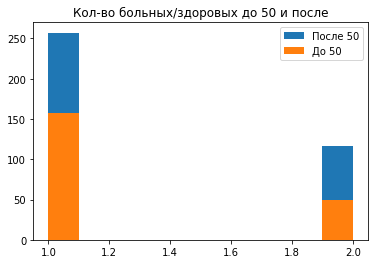

In [17]:
bef_50 = data[data['Age']<=50]['Dataset']
aft_50 = data[data['Age']>50]['Dataset']
plt.hist(bef_50)
plt.hist(aft_50)
plt.title('Кол-во больных/здоровых до 50 и после')
plt.legend(['После 50', 'До 50'])
plt.show()

In [18]:
print( "Среднее для bef_50 : " , bef_50.mean())
print("Q2 квантиль ряда bef_50 : ", np.quantile(bef_50, .50)) 

print( "Среднее для aft_50 : " , aft_50.mean())
print("Q2 квантиль ряда aft_50 : ", np.quantile(aft_50, .50)) 

Среднее для bef_50 :  1.3109919571045576
Q2 квантиль ряда bef_50 :  1.0
Среднее для aft_50 :  1.2378640776699028
Q2 квантиль ряда aft_50 :  1.0


<font color='red'>Среднее значение, это усредненный показатель по всей выборке ( средня температура по больнице), а 2-я квантиль это медиана. Медиана делит выборку напополам, так что меньше нее находится ровно половина значений</font>

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [19]:
sick = data[data['Dataset'] == 1 ]['Total_Bilirubin']
stats.ttest_1samp(sick, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.4588588880494733, pvalue=0.014347239706774866)

<font color='red'>P-value меньше чем 0,05 , что позволяет нам отвергнуть гипотезу о том, что выборки схожи. Т.е они различны
О еще я почитал очень интересную штуку про критерий Стьюдента. Так вот, его разработал не Стьюдент, а Уильям Госсет. Просто опубликовали в научном издании с названием Student. Делюсь если вы не знали</font>

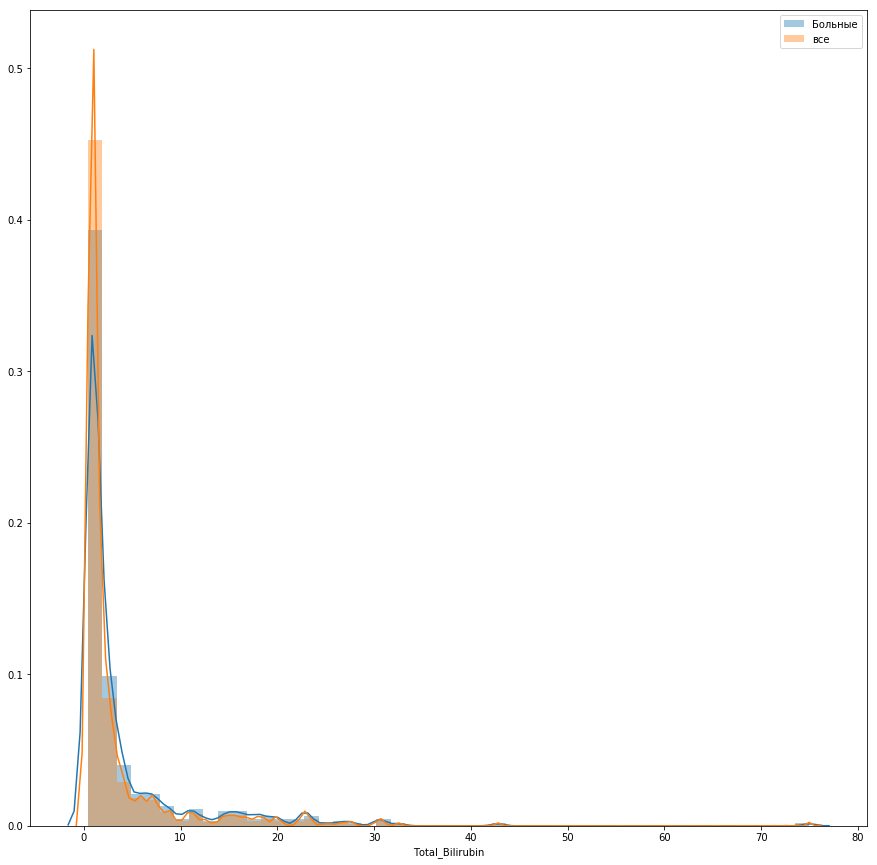

In [20]:
rcParams['figure.figsize'] = 15,15
sick = data[data['Dataset'] == 1 ]['Total_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
sns.distplot(sick)
sns.distplot(Total_Bilirubin)
plt.legend(['Больные', 'все'], prop={'size': 10})
plt.show()


<font color='red'>Построил график чтоб посмотреть, но если честно, не похоже, что они различаются практически</font>

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

<font color='red'>Он ругался что выборки разной длины, я урезал ( можно и нужно ли это как то обходить? может при помощи средних, или можно как то более деликатно привести их к схожему виду?)</font>

In [29]:
print(len(sick))
print(len(healthy))

414
165


In [30]:
sick = data[data['Dataset'] == 1 ]['Total_Bilirubin'][:165]
healthy = data[data['Dataset'] == 2 ]['Total_Bilirubin']
stats.ttest_rel(sick, healthy)

Ttest_relResult(statistic=5.123173515986333, pvalue=8.357507995321674e-07)

In [23]:
x = 8.357507995321674e-07
round(x, 5)

0.0

<font color='red'>
P - value сильно меньше 0.05 , т.е выборки различаются. Гипотеза о том что они схожи, отвергается</font>

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [34]:
Group_Age_1 = data[(data['Age']>= 1) & (data['Age'] < 30)]['Dataset']

Group_Age_2 = data[(data['Age']>= 30) & (data['Age'] < 55)]['Dataset']

Group_Age_3 = data[data['Age']>= 55]['Dataset']

stats.f_oneway(Group_Age_1, Group_Age_2, Group_Age_3)

F_onewayResult(statistic=8.893368703518503, pvalue=0.00015706998544799423)

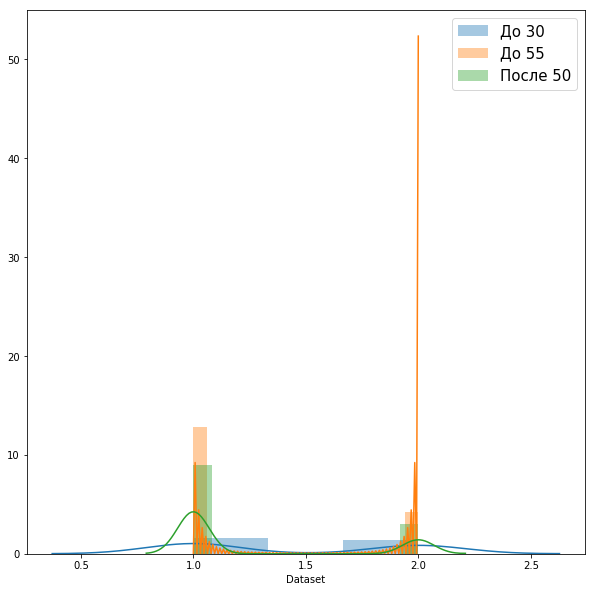

In [27]:
rcParams['figure.figsize'] = 10,10
Group_Age_1 = data[(data['Age']>= 1) & (data['Age'] < 30)]['Dataset']
Group_Age_2 = data[(data['Age']>= 30) & (data['Age'] < 55)]['Dataset']
Group_Age_3 = data[data['Age']>= 55]['Dataset']
sns.distplot(Group_Age_1)
sns.distplot(Group_Age_2)
sns.distplot(Group_Age_3)
plt.legend(['До 30', 'До 55', 'После 50'], prop={'size': 15})
plt.show()


<font color='red'> Они логично что отличаются
</font>

Вопросы задавать на почту yustiks@gmail.com